<a href="https://colab.research.google.com/github/yolandaakp/PeramalanANDAT2023/blob/main/PeramalanBRITANNIA_Yolanda_Kurnia_Putri_3333210092_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

melakukan import library. import pandas untuk menganalisis data import numpy untuk pengolahan data operasi matematika import matplotlib untuk membuat grafik dan plot dari data yang di input import seaborn untuk membuat grafik dan statistik, dibuat berdasarkan library matplotlib yang terintegrasi dengan struktur data pada pandas import math untuk mengevaluasi operasi matematika yang kompleks import datetime untuk input datetime dari data %matplotlib inline untuk membuat grafik atau plot yang ditampilkan dalam bentuk notebook.

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data

In [3]:
# https://drive.google.com/file/d/1xj4aE7A4JW72SD4N07APV2FNGgRprPMx/view?usp=drive_link

!gdown 1xj4aE7A4JW72SD4N07APV2FNGgRprPMx

Downloading...
From: https://drive.google.com/uc?id=1xj4aE7A4JW72SD4N07APV2FNGgRprPMx
To: /content/BRITANNIA.csv
100% 613k/613k [00:00<00:00, 166MB/s]


Syntax diatas digunakan untuk download dataset yang telah diupload di gdrive.

In [4]:
train_data = pd.read_csv('BRITANNIA.csv')
train_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
1,2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2,2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
3,2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
4,2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


Syntax diatas digunakan untuk membaca file csv yang ada pada dataset dengan nama 'BRITANNIA.csv' dan disimpan dengan nama variabel "train_data". Kemudian, data tersebut ditampilkan ke bentuk dataframe yang terdiri dari 5 baris

Check missing values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5305 non-null   object 
 1   Symbol              5305 non-null   object 
 2   Series              5305 non-null   object 
 3   Prev Close          5305 non-null   float64
 4   Open                5305 non-null   float64
 5   High                5305 non-null   float64
 6   Low                 5305 non-null   float64
 7   Last                5305 non-null   float64
 8   Close               5305 non-null   float64
 9   VWAP                5305 non-null   float64
 10  Volume              5305 non-null   int64  
 11  Turnover            5305 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4796 non-null   float64
 14  %Deliverble         4796 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.8

Syntax diatas digunakan untuk mengetahui apakah ada missing values dari masing-masing fields

Check statistic vales for every features

In [6]:
train_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5.305000e+03,5.305000e+03,2456.000000,4.796000e+03,4796.000000
mean,1687.974769,1690.173054,1713.527135,1665.679293,1688.601112,1688.492347,1689.630878,1.220883e+05,3.531071e+13,19243.627850,6.877725e+04,0.644524
std,1364.834888,1367.095820,1379.848544,1350.727532,1365.080043,1364.982005,1365.360931,2.668956e+05,9.119291e+13,22420.581857,1.340685e+05,0.179159
min,336.350000,340.000000,347.700000,295.200000,336.950000,336.350000,339.860000,8.400000e+01,9.614630e+09,27.000000,5.700000e+01,0.027900
25%,591.800000,594.500000,603.900000,580.200000,592.500000,591.800000,592.100000,4.284000e+03,3.694440e+11,4496.750000,3.040500e+03,0.518900
50%,1230.150000,1230.000000,1259.000000,1203.350000,1230.000000,1230.300000,1232.610000,2.002900e+04,1.347110e+12,13231.000000,1.913050e+04,0.651350
75%,2743.700000,2741.050000,2778.400000,2701.100000,2747.000000,2743.900000,2743.300000,1.347500e+05,3.634675e+13,24920.750000,8.919100e+04,0.777425
max,6900.150000,6918.000000,6934.350000,6831.700000,6898.000000,6900.150000,6886.460000,5.383773e+06,1.954734e+15,294264.000000,4.253015e+06,1.000000


Syntax diatas digunakan untuk melihat statistic summary dari dataset.

Handle datetime data for time series

In [7]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BRITANNIA,EQ,703.25,705.0,759.50,705.0,758.0,756.90,741.01,7512,5.566488e+11,NaN,NaN,NaN
2000-01-04,BRITANNIA,EQ,756.90,710.0,770.00,710.0,740.0,754.55,742.52,8135,6.040391e+11,NaN,NaN,NaN
2000-01-05,BRITANNIA,EQ,754.55,755.0,759.00,705.0,740.0,735.30,739.92,6095,4.509784e+11,NaN,NaN,NaN
2000-01-06,BRITANNIA,EQ,735.30,740.0,794.15,740.0,770.0,785.65,788.83,19697,1.553756e+12,NaN,NaN,NaN
2000-01-07,BRITANNIA,EQ,785.65,808.0,848.50,798.0,848.5,848.50,827.53,33107,2.739708e+12,NaN,NaN,NaN


Syntax diatas diunakan untuk menganalisis berdasarkan data waktu

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

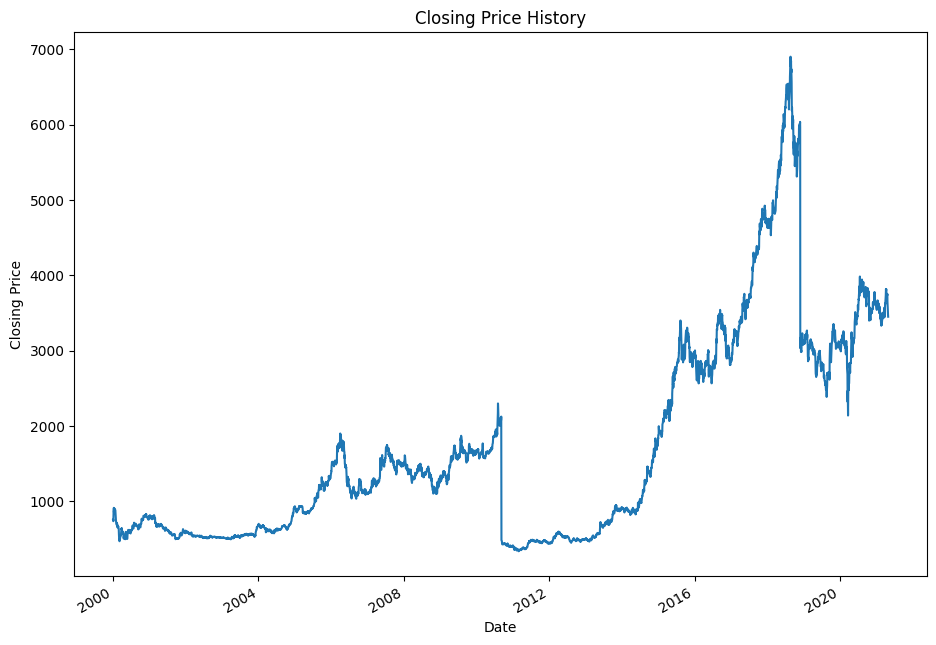

In [8]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Grafik diatas menunjukkan kenaikan atau penurunan dari closing price yang ditinjau berdasarkan waktu.

<Figure size 1600x800 with 0 Axes>

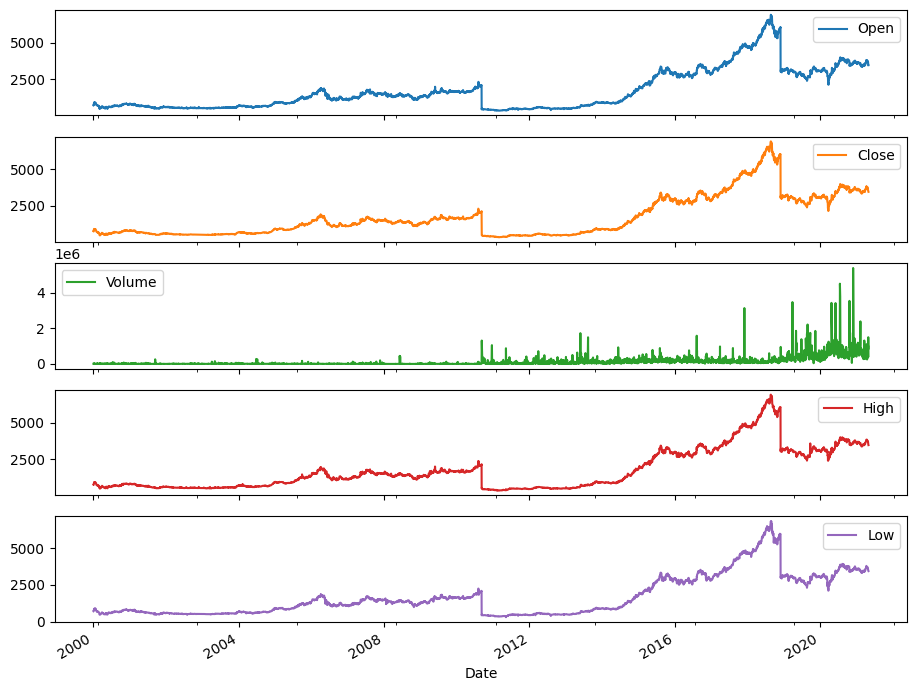

In [9]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Untuk data open, high, low, close dan volume merupakan jenis data stasioner karena mengalami kenaikan dan penurunan

In [10]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

HL_PCT merupakan kolom baru yang berisikan persentasi perubahan dari fields 'High' dan 'Low'.

In [12]:
df = train_data[['HL_PCT', 'PCT_change', 'Close','Volume']]

In [13]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Close'].shift(-forecast_out)

266


<ipython-input-13-e4fd59988e6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Close'].shift(-forecast_out)


Membuat fitur baru untuk data frame yang baru

Harga penutupan saham atau field close dijadikan label.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

import StandardScaler: normalisasi data import LinearRegression, Ridge: regresi linear dari regresi ridge import randomforestregressor: melatih model regresi menggunakan algoritma Random Forest import SVR: melatih model regresi menggunakan metode Support Vector Regression dan merupakan salah satu metode yang bisa untuk peramalan import train_test_split: membagi dataset menjadi subset pelatihan dan pengujian import mean_squared_log_error: menghitung metrik kesalahan regresi berupa mean squared logarithmic error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [15]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-15-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Melakukan scalling. Pake standardscaler untuk normalisasi data karena data berisi harga saham dengan interval atau range yang jauh.

In [16]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

melakukan slicing. mengambil 'forecast_out' baris akhir dari 'x' dan hasilnya disimpan dengan nama variabel 'X_Predictions' yang berisi data yang akan diprediksi. selanjutnya mengambil semua baris dari 'x' kecuali 'forecast_out' baris terakhir untuk melatih model

In [17]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-17-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


menghapus baris-baris yang mengandung nilai yang hilang (NaN) dari dataset dengan parameter inplace = true. Selanjutnya membuat variabel y yang isinya kolom 'label'.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Melakukan splitting. dilakukan dengan 2 model (LinearRegression dan Random Forest Regressor)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [20]:
lr_confidence

0.6171778602983312

In [21]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Random forest akan berisi banyak tree, kemudian di voting pohon atau tree yang mana yang bagus.

In [22]:
rf_confidence

0.935815547291589

In [23]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-23-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-23-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-23-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

input variabel last_date, last_unix, one_day, dan lainnya yang akan dijadikan sumber untuk data forecasting.

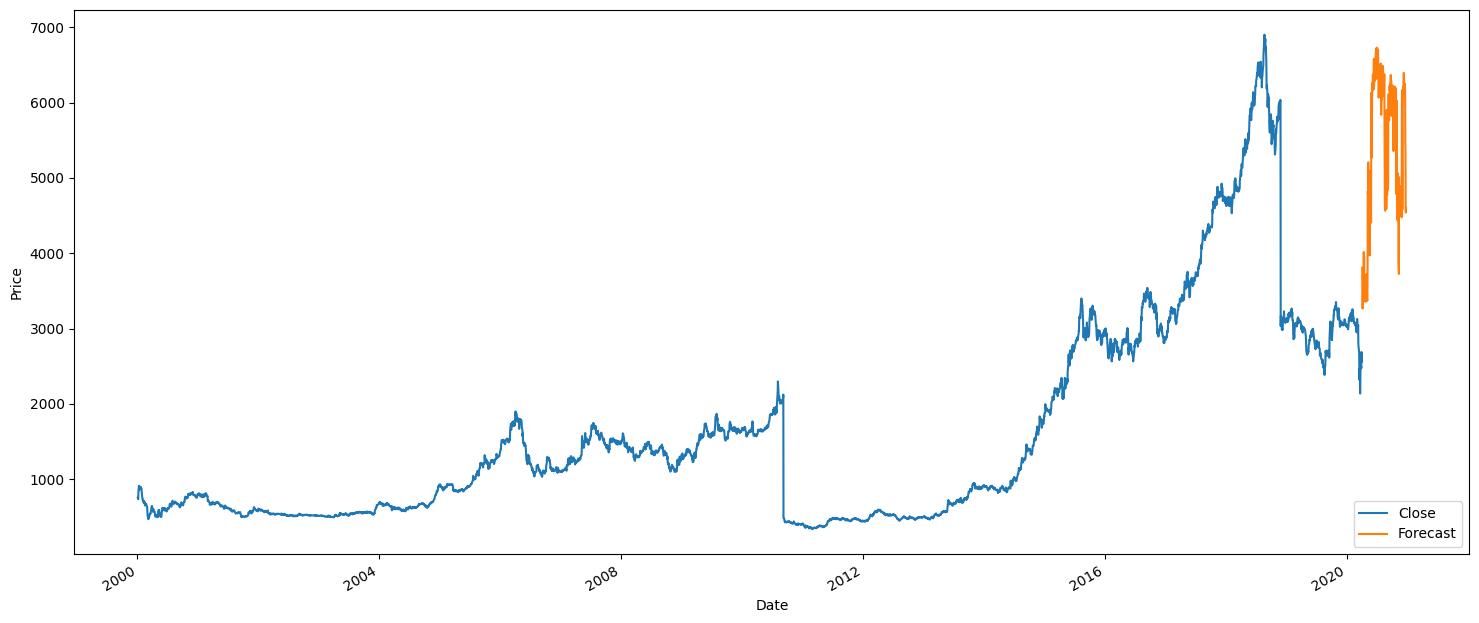

In [24]:
plt.figure(figsize=(18, 8))
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Dari hasil peramalan yang dilakukan, akan terjadi kenaikan yang drastis pada tahun 2020, tetapi akan terjadi penurunan kembali. Data forecasting yang didapatkan berjenis stasioner.